<a href="https://colab.research.google.com/github/CarolinaOliveira001/Complex_Network/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 414.edges to 414.edges


In [2]:
pip install node2vec==0.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=082c5674a3b64bd88ef066eb3779821bd19fd6a15aecdc742e2ac675659e9dce
  Stored in directory: /root/.cache/pip/wheels/f9/b5/dd/9d0f537aa176c7e97e050850e4bf25573e035aaddb06f5588a
Successfully built node2vec


In [3]:
import networkx as nx
from random import sample
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import sklearn.metrics as sm
from itertools import product
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [4]:
filenameFacebook = "414.edges"

graphFacebook = nx.Graph()
trueGraphFacebook = nx.Graph()

with open(filenameFacebook) as f:
    for line in f:
        x = line.split()
        a = int(x[0])
        b = int(x[1])
        
        if a not in list(graphFacebook.nodes):
            graphFacebook.add_node(a)
            trueGraphFacebook.add_node(a)
        if b not in list(graphFacebook.nodes):
            graphFacebook.add_node(b)
            trueGraphFacebook.add_node(b)

        graphFacebook.add_edge(a, b)
        trueGraphFacebook.add_edge(a, b)

In [5]:
len(graphFacebook.edges())

1693

In [6]:
random_edges = set(sample(list(graphFacebook.edges()), int(round(graphFacebook.number_of_edges()*10/100, 0))))

In [7]:
for edge in random_edges:
  graphFacebook.remove_edge(edge[0], edge[1])

In [8]:
graphFacebookWithoutRemovedEdges = list(graphFacebook.edges())

# Homework 9

Most of this code was taking from the previous assignment. Look at the end of this part to see that part added.

In [17]:
predictedModel = nx.adamic_adar_index(graphFacebook)

In [18]:
listOfPredictedEdges = []

for u, v, p in predictedModel:
    listOfPredictedEdges.append((u, v, p))

In [19]:
listOfPredictedEdges = sorted(listOfPredictedEdges, key=lambda tup: tup[2], reverse=True)

In [20]:
highestAdamicAdarModel = listOfPredictedEdges[0][2]

In [21]:
listOfProbabilityEdges = []

for (a, b, p) in listOfPredictedEdges:
  listOfProbabilityEdges.append([(a, b), p/highestAdamicAdarModel])

In [22]:
completetrueGraphFacebook = nx.complete_graph(trueGraphFacebook.nodes())

In [23]:
listOfAllPossibleEdges = list(completetrueGraphFacebook.edges())

In [24]:
for edge in graphFacebookWithoutRemovedEdges:
  listOfAllPossibleEdges.remove(edge)

In [25]:
listOfTrueGraphFacebooksEdges = []

for edge in listOfAllPossibleEdges:
  if edge in list(trueGraphFacebook.edges()):
    listOfTrueGraphFacebooksEdges.append(1)
  else:
    listOfTrueGraphFacebooksEdges.append(0)

In [26]:
listOfProbabilityGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      valueHelper.append(listOfProbabilityEdges[idx][1])
    
  if len(valueHelper) == 0:
    listOfProbabilityGraphFacebooksEdges.append(0)
  else:
    listOfProbabilityGraphFacebooksEdges.append(valueHelper[0])

In [27]:
listOfGraphFacebooksEdges = []

for edgeA in listOfAllPossibleEdges:
  valueHelper = []
  for idx in range(0, len(listOfProbabilityEdges)):
    edgeB = listOfProbabilityEdges[idx][0]
    if edgeA == edgeB:
      if listOfProbabilityEdges[idx][1] > 0.5:
        valueHelper.append(1)
      else:
        valueHelper.append(0)
  
  if(len(valueHelper) == 0):
    listOfGraphFacebooksEdges.append(0)
  else:
    listOfGraphFacebooksEdges.append(valueHelper[0])

In [28]:
precision = precision_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [29]:
print(f'Precision: {precision}')

Precision: 0.3425925925925926


In [30]:
accuracy = accuracy_score(listOfTrueGraphFacebooksEdges, listOfGraphFacebooksEdges)

In [31]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.978965910268366


In [32]:
complementOfSpecificity, sensitivity, __ = roc_curve(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)

In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

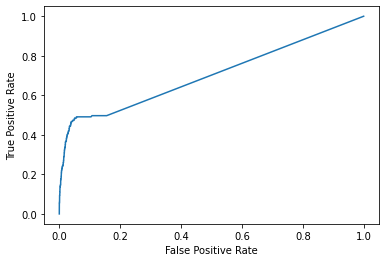

In [34]:
plot_roc_curve(complementOfSpecificity, sensitivity)

In [35]:
print(f'AUC score: {roc_auc_score(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)}')

AUC score: 0.7017076266585458


From now on this code was added for this assignment. 

This aims to count how many edges from the removed edges of graph Facebook were really predicted as an edge. We can see that only 37 out of 169 edges were found.

In [46]:
theDesiredEdgesPrediction = []
for i in listOfProbabilityEdges:
  if i[0] in random_edges:
    theDesiredEdgesPrediction.append(i)

In [48]:
for i in theDesiredEdgesPrediction:
  if i[1] >= 0.5:
    i[1] = 1
  else:
    i[1] = 0

In [50]:
countThePredictedRemovedEdges = []
for i in theDesiredEdgesPrediction:
  countThePredictedRemovedEdges.append(i[1])

In [52]:
print(sum(countThePredictedRemovedEdges))

37


#Homework 10

We use the node2vec to assign every node to a specific and unique vector. We fit the model and save the vector in a dataframe with the index being the corresponding nodes ID.

In [9]:
node2vec = Node2Vec(graphFacebook, dimensions=64, seed = 42)

Computing transition probabilities:   0%|          | 0/150 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


In [70]:
model = node2vec.fit(min_count=1, batch_words=4)

In [15]:
emb_df = (pd.DataFrame([model.wv.get_vector(str(n)) for n in graphFacebook.nodes()],
                       index = graphFacebook.nodes))

We multiply the two vectors together and that will be the feature used to help the model the edges. We will have a numpy array with the features as X and the y will be an array of 1 or 0 depending if the tuple in allPossibleEdgesWithoutDeletedEdges is an edge in the graphFacebook. We split the data into training and test. Testing data will be 30% of the whole data.

The chosen model is the GradientBoostingClassifier and we will train it with the training data. After that we will predict the test data. Now it only remains to use some metrics to see how good our model was.

In [83]:
unique_nodes = list(graphFacebook.nodes())

allPossibleEdgesWithoutDeletedEdges = []
for u in unique_nodes:
  for v in unique_nodes:
    if (u, v) not in random_edges and (v, u) not in random_edges:
      allPossibleEdgesWithoutDeletedEdges.append((u, v))

edge_features = [(model.wv.get_vector(str(i)) * model.wv.get_vector(str(j))) for i,j in allPossibleEdgesWithoutDeletedEdges]

y = [1 if e in graphFacebookWithoutRemovedEdges else 0 for e in allPossibleEdgesWithoutDeletedEdges]

In [84]:
X = np.array(edge_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_train)

Accuracy

In [86]:
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, X_pred)
print("Testing Accuracy : ", test_acc)
print("Training Accuracy : ", train_acc)

Testing Accuracy :  0.9234471349075049
Training Accuracy :  0.9335396119383743


Precision

In [87]:
test_prec = precision_score(y_test, y_pred)
train_prec = precision_score(y_train, X_pred)
print("Testing Precision : ", test_prec)
print("Training Precision : ", train_prec)

Testing Precision :  0.125
Training Precision :  0.6420454545454546


ROC-curve

In [88]:
complementOfSpecificity, sensitivity, __ = roc_curve(y_test, y_pred)

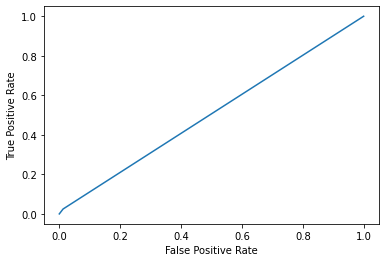

In [89]:
plot_roc_curve(complementOfSpecificity, sensitivity)

ROC-AUC Score

In [90]:
print(f'AUC score: {roc_auc_score(listOfTrueGraphFacebooksEdges, listOfProbabilityGraphFacebooksEdges)}')

AUC score: 0.7017076266585458


This aims to count how many edges from the removed edges of graph Facebook were really predicted as an edge. We can see that only 10 out of 169 edges were found.

In [95]:
edge_features_from_desired_edges = [(model.wv.get_vector(str(i)) * model.wv.get_vector(str(j))) for i,j in random_edges]

In [96]:
X_desired_edges = np.array(edge_features_from_desired_edges)

In [97]:
countThePredictedRemovedEdges = clf.predict(X_desired_edges)

In [98]:
sum(countThePredictedRemovedEdges)

10

# Conclusion

After some study, we noticed that the adamic_adar_index algorithm contains better results than the GradientBoostingClassifier algorithm.